<a href="https://colab.research.google.com/github/annglee/Software-Enginering-/blob/main/Copy_of_PhaseTwo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

# Display first few rows
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# Basic info: number of rows, columns, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
# Summary statistics for numerical features
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

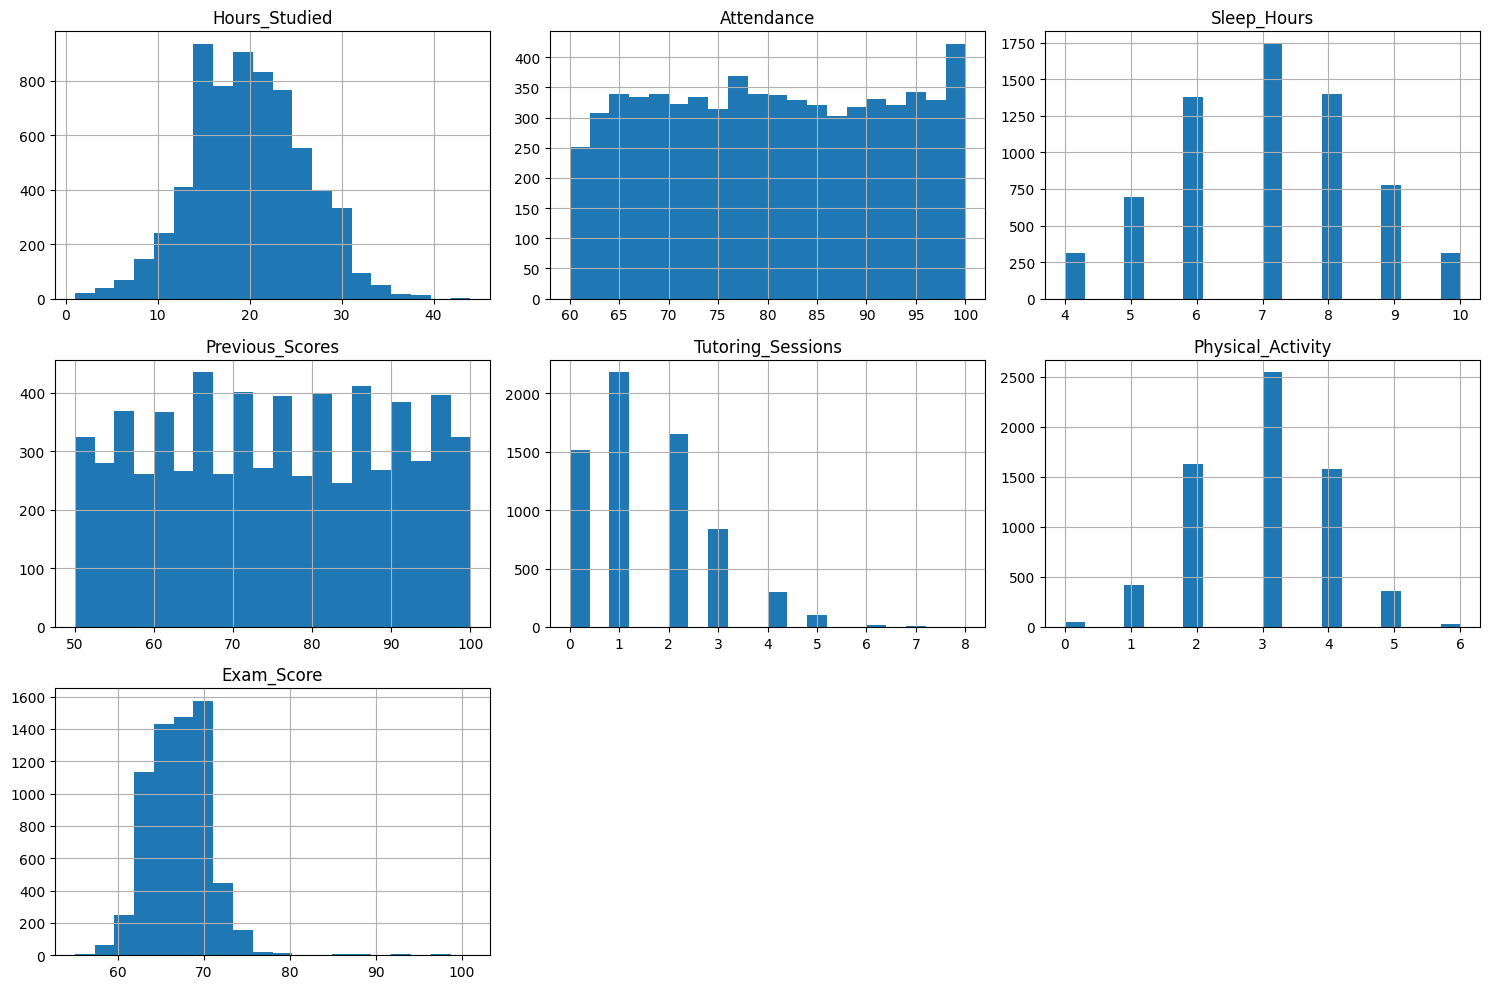

In [ ]:
# Distribution of each numerical feature
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

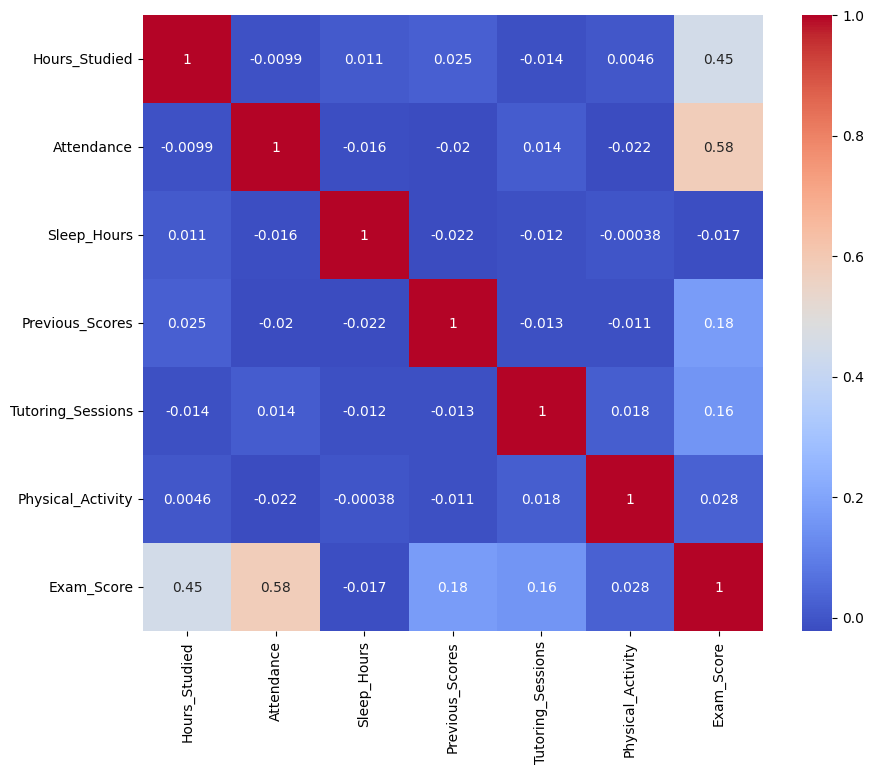

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Check value counts of categorical features (if any)
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for Parental_Involvement:
 Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

Value counts for Access_to_Resources:
 Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

Value counts for Extracurricular_Activities:
 Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

Value counts for Motivation_Level:
 Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

Value counts for Internet_Access:
 Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

Value counts for Family_Income:
 Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

Value counts for Teacher_Quality:
 Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

Value counts for School_Type:
 School_Type
Public     4598
Private    2009
Name: count, dtype: int64

Value counts for Peer_Influence:
 Peer_I

In [ ]:
# Handle Missing Values
# Fill numerical NaNs with mean, categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Remove Duplicates
df = df.drop_duplicates()

In [ ]:
# Handle Outliers (Z-score method)
from scipy import stats
import numpy as np

# Z-score outlier removal (threshold = 3)
df = df[(np.abs(stats.zscore(df.select_dtypes(include='number'))) < 3).all(axis=1)]

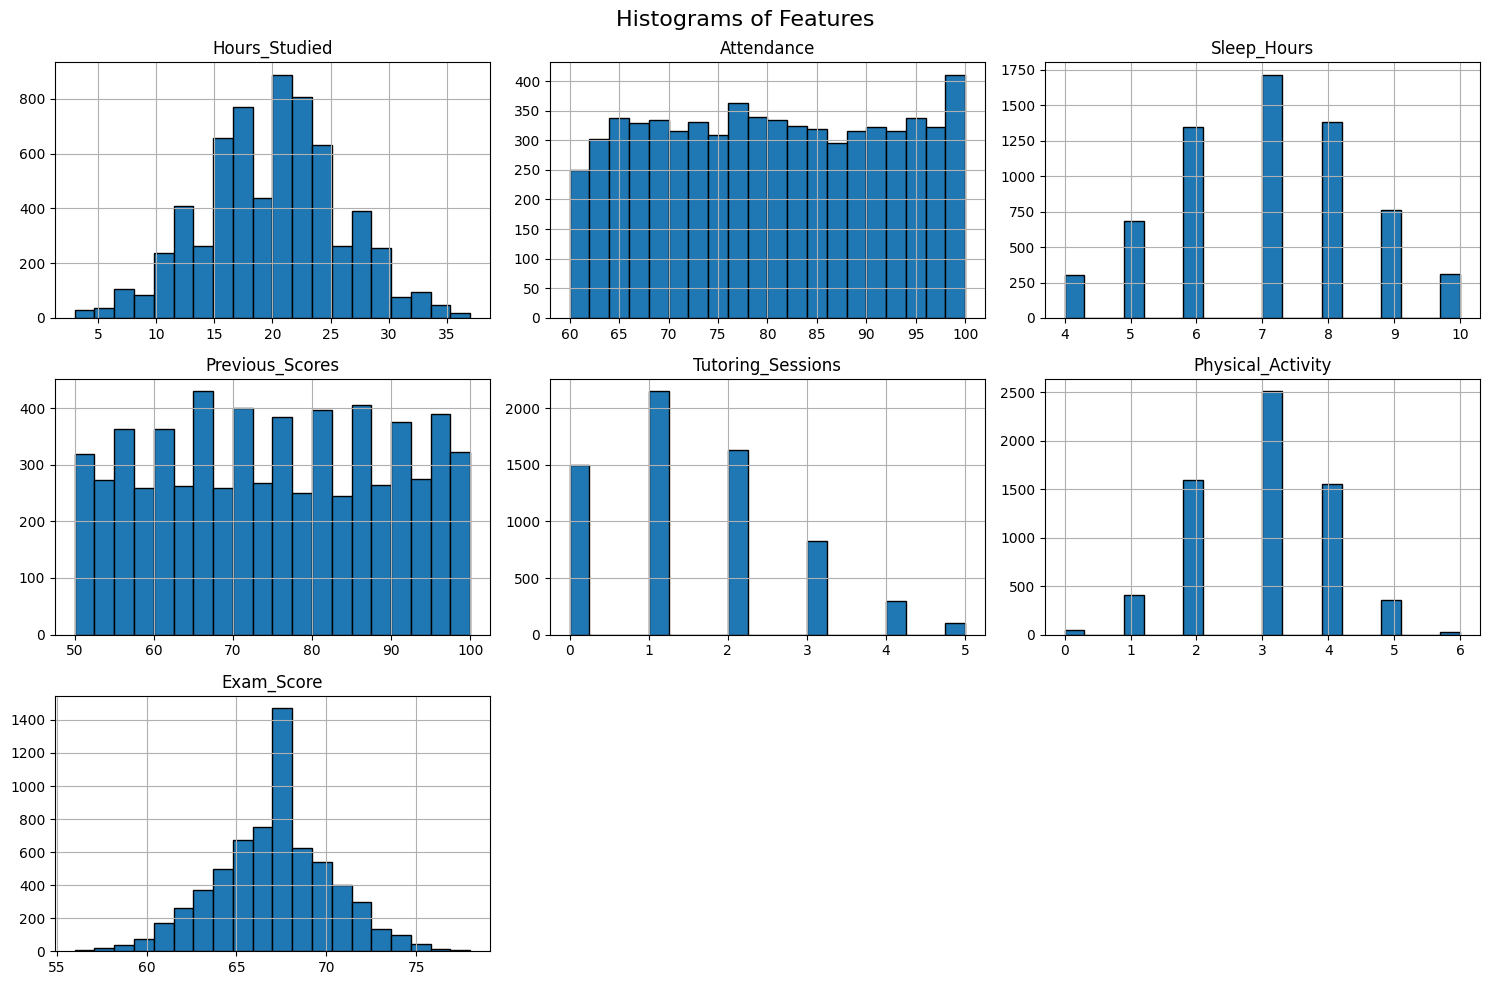

In [ ]:
# Histogram of each numerical feature
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.tight_layout()
plt.show()

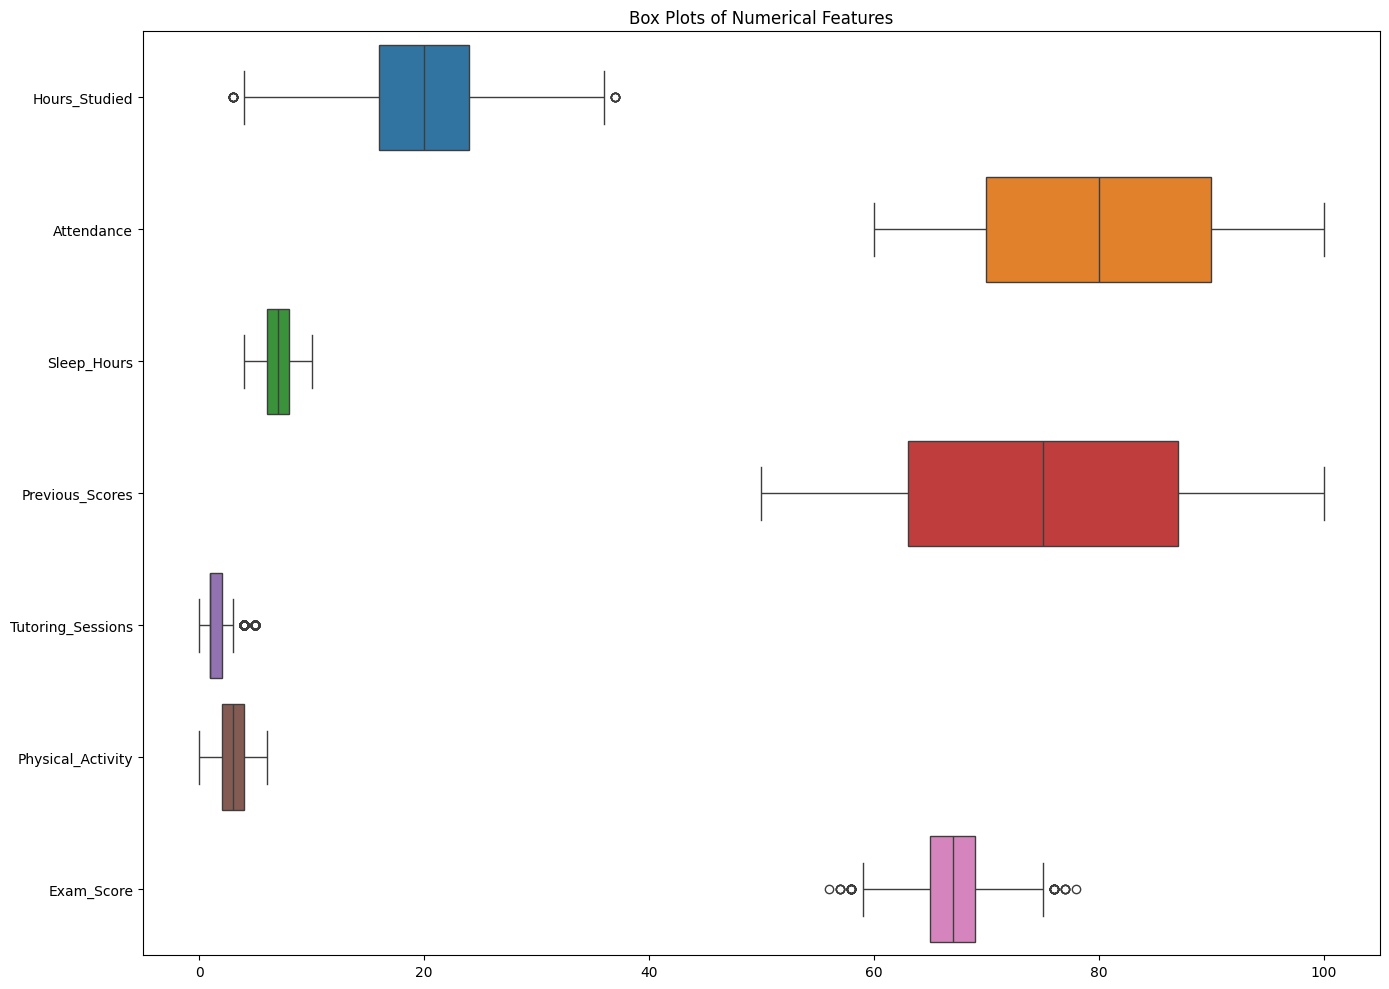

In [ ]:
# Box plots to check for outliers
plt.figure(figsize=(14, 10))
sns.boxplot(data=df.select_dtypes(include='number'), orient='h')
plt.title('Box Plots of Numerical Features')
plt.tight_layout()
plt.show()

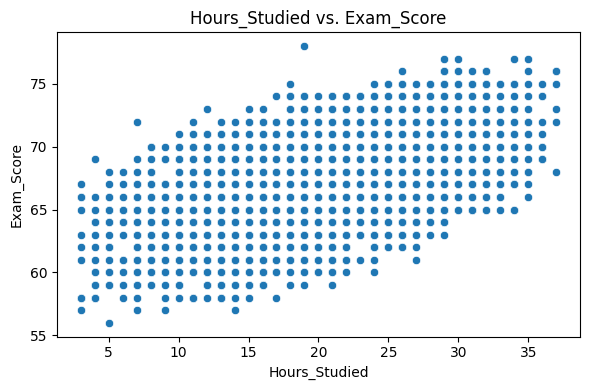

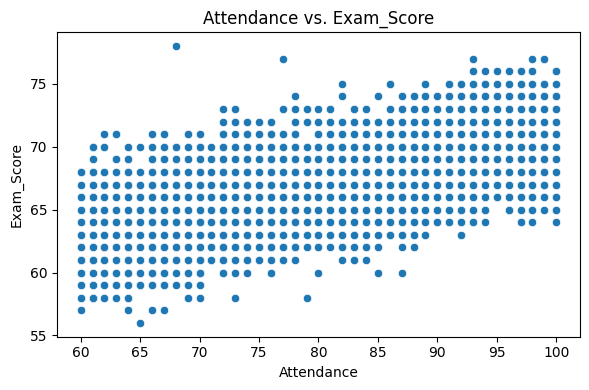

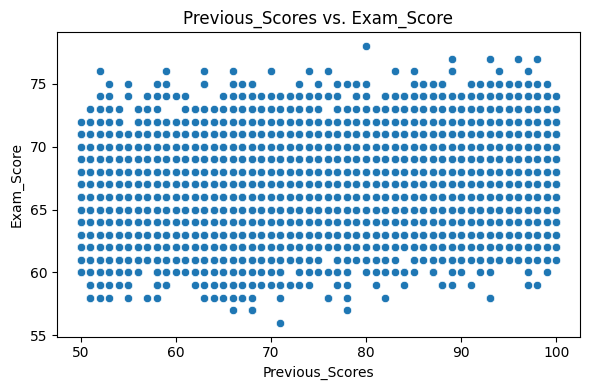

In [ ]:
# Scatter plots of selected features vs. Exam_Score
important_features = ['Hours_Studied', 'Attendance', 'Previous_Scores']
for feature in important_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['Exam_Score'])
    plt.title(f'{feature} vs. Exam_Score')
    plt.xlabel(feature)
    plt.ylabel('Exam_Score')
    plt.tight_layout()
    plt.show()

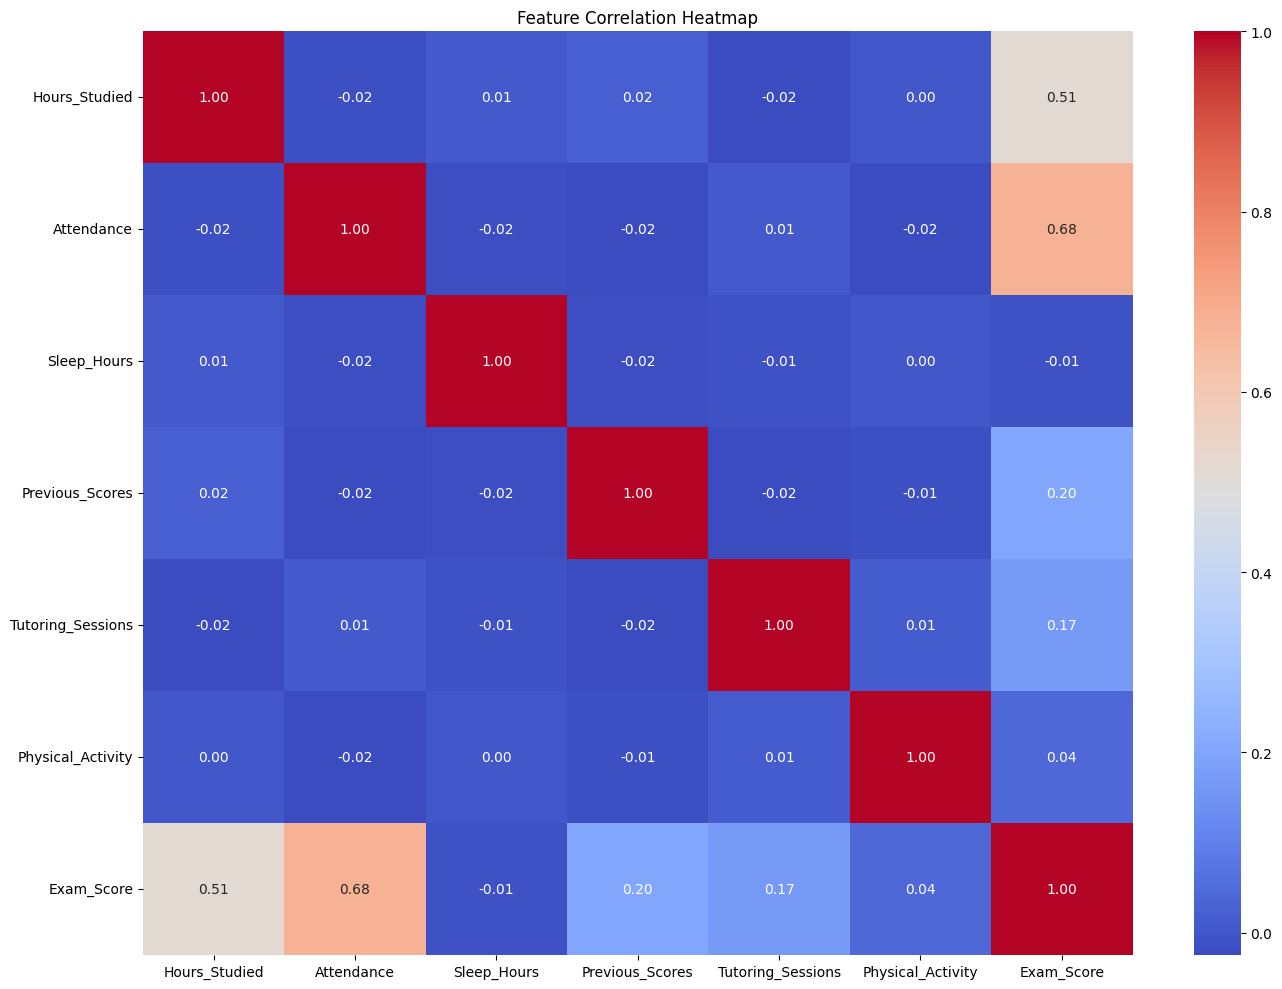

In [ ]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(14, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Encode Categorical Data
# Label encode binary columns, One-Hot encode multiclass
from sklearn.preprocessing import LabelEncoder

# Label encode binary
le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col])

In [ ]:
# Correlation heatmap after label encoding
plt.figure(figsize=(14, 10))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
# Normalize Numerical Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[df.select_dtypes(include='number').columns] = scaler.fit_transform(df.select_dtypes(include='number'))

In [ ]:
# Check again for missing values after preprocessing
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Optional: check if there are any missing values at all
if missing_values.sum() == 0:
    print("\n✅ No missing values remaining in the dataset.")
else:
    print("\n⚠️ There are still missing values that need to be handled.")

In [ ]:
# Save the cleaned dataset
df.to_csv('/content/CleanedStudentPerformanceFactors.csv', index=False)